### Premise

Let's take a few different pre-trained models, and test how they do across some different prompts over a set of tasks.
Specifically, we'll record how these models perform across 32 randomly sampled prompts (using a set of 200 supporting examples) for each k (number of examples in a prompt) for the ks 0, 1, 2, 4, 8, 16, 32.
We record performance over 32 examples (not very many for computational reasons) for each task.

In [4]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import os
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.concat([
#     pd.read_csv(os.path.join('results_dir', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir2', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir3', 'results.csv')),
#     pd.read_csv(os.path.join('results_dir4', 'results.csv')),
#     pd.read_csv(os.path.join('results/results_gpt2finetuned', 'results.csv')),
#     pd.read_csv(os.path.join('results/results_gpt2', 'results.csv')),
#     pd.read_csv(os.path.join('results/results_gptj', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2orig', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2orig_2', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2orig_3', 'results.csv')),
    pd.read_csv(os.path.join('results/results_gpt2orig_4', 'results.csv')),
])
df1['sampling'] = 'within_task_random'
df1['method'] = 'in_context'
# df2 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_finetuned', 'results.csv')),
# ])
# df2['sampling'] = 'within_task_random'
# df2['method'] = 'finetuned'
# df3 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_uncertainty_sampling/results.csv'))
# ])
# df3['sampling'] = 'uncertainty_sampling'
# df4 = pd.concat([
#     pd.read_csv(os.path.join('results/results_gpt2_uncertainty_sampling_top_n32/results.csv'))
# ])
# df4['sampling'] = 'uncertainty_sampling_top32'
df = pd.concat([
    df1,
#     df2,
#     df3,
#     df4
])
df['descriptor'] = df[['checkpoint', 'sampling', 'method']].apply(tuple, axis=1)
df['k_scatter'] = df['k'].apply(lambda k: {0: 0, 1: 1, 2: 2, 4: 3, 8:4, 16:5, 32:6}[k])
df = df.drop_duplicates(['task', 'train_indices', 'descriptor'])
df

k   task  prompt_seed  \
0    16   qasc            0   
1    16   qasc            1   
2    16   qasc            2   
3    16   qasc            3   
4    16   qasc            4   
..   ..    ...          ...   
879   1  dream            0   
880   1  dream            1   
881   1  dream            2   
882   1  dream            3   
884   1  dream            5   

                                         train_samples  \
0    [{'task': 'qasc', 'input': 'Arterioles carry w...   
1    [{'task': 'qasc', 'input': 'what females lack ...   
2    [{'task': 'qasc', 'input': 'what does an autom...   
3    [{'task': 'qasc', 'input': 'what are used for ...   
4    [{'task': 'qasc', 'input': 'what are used for ...   
..                                                 ...   
879  [{'task': 'dream', 'input': 'When will they vi...   
880  [{'task': 'dream', 'input': "What was wrong wi...   
881  [{'task': 'dream', 'input': "How does the woma...   
882  [{'task': 'dream', 'input': "How does Bob go t...   
884  [{'task': 'dream', 'input': 'To whom is the ma...   

                                         train_indices  result        gpt2  \
0    [98, 194, 107, 10, 66, 130, 124, 103, 77, 122,...   0.145  gpt2-large   
1    [34, 145, 195, 16, 65, 30, 126, 194, 115, 120,...   0.175  gpt2-large   
2    [14, 23, 21, 92, 43, 188, 171, 78, 64, 155, 54...   0.210  gpt2-large   
3    [60, 151, 139, 33, 94, 154, 121, 160, 148, 16,...   0.160  gpt2-large   
4    [60, 77, 26, 184, 101, 122, 39, 23, 17, 5, 102...   0.180  gpt2-large   
..                                                 ...     ...         ...   
879                                               [98]   0.460  gpt2-large   
880                                               [34]   0.450  gpt2-large   
881                                               [14]   0.455  gpt2-large   
882                                               [60]   0.450  gpt2-large   
884                                              [159]   0.430  gpt2-large   

     checkpoint            sampling      method  \
0    gpt2-large  within_task_random  in_context   
1    gpt2-large  within_task_random  in_context   
2    gpt2-large  within_task_random  in_context   
3    gpt2-large  within_task_random  in_context   
4    gpt2-large  within_task_random  in_context   
..          ...                 ...         ...   
879  gpt2-large  within_task_random  in_context   
880  gpt2-large  within_task_random  in_context   
881  gpt2-large  within_task_random  in_context   
882  gpt2-large  within_task_random  in_context   
884  gpt2-large  within_task_random  in_context   

                                       descriptor  k_scatter  
0    (gpt2-large, within_task_random, in_context)          5  
1    (gpt2-large, within_task_random, in_context)          5  
2    (gpt2-large, within_task_random, in_context)          5  
3    (gpt2-large, within_task_random, in_context)          5  
4    (gpt2-large, within_task_random, in_context)          5  
..                                            ...        ...  
879  (gpt2-large, within_task_random, in_context)          1  
880  (gpt2-large, within_task_random, in_context)          1  
881  (gpt2-large, within_task_random, in_context)          1  
882  (gpt2-large, within_task_random, in_context)          1  
884  (gpt2-large, within_task_random, in_context)          1  

[837 rows x 12 columns]

### We might not have all of the tasks for each model, let's check

In [5]:
ckpts = sorted(list(set(df.checkpoint)))
tasks = sorted(list(set(df.task)))
samplings = sorted(list(set(df.sampling)))
methods = sorted(list(set(df.method)))
breakdown_df = pd.DataFrame({
    task: {
        (ch, sampling, method): len(df[(df.task == task) & (df.checkpoint == ch) & (df.sampling == sampling) & (df.method == method)])
        for ch in ckpts for sampling in samplings for method in methods
    } for task in tasks}).transpose()
print(len(breakdown_df))
def get_common_completed_tasks(descriptors):
    selector = completed_tasks_df.index == completed_tasks_df.index
    for checkpoint, sampling, method in descriptors:
        selector = selector & (completed_tasks_df[(checkpoint, sampling, method)] == 'X')
    return completed_tasks_df[selector].index.tolist()
breakdown_df

7


gpt2-large
           within_task_random
                   in_context
codah                      48
dream                       6
glue-mrpc                  48
openbookqa                 48
piqa                      376
qasc                      263
quarel                     48

### Plot prompt similarity in relation to the difference in result

glue-mrpc ('gpt2-large', 'within_task_random', 'in_context')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 5477.59it/s]


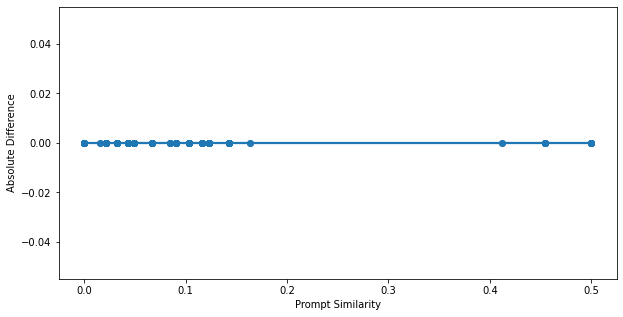

dream ('gpt2-large', 'within_task_random', 'in_context')
piqa ('gpt2-large', 'within_task_random', 'in_context')


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 141000/141000 [00:20<00:00, 6764.52it/s]


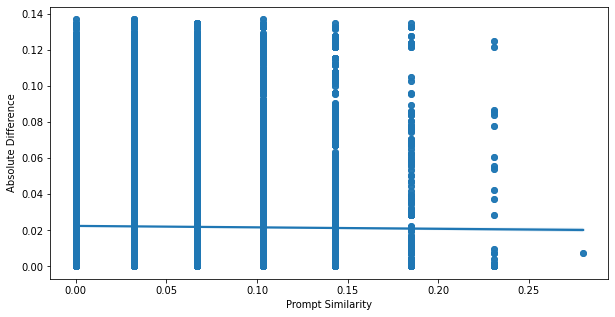

qasc ('gpt2-large', 'within_task_random', 'in_context')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53130/53130 [00:07<00:00, 6745.12it/s]


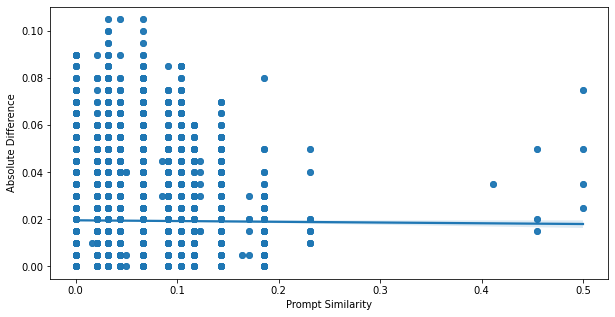

quarel ('gpt2-large', 'within_task_random', 'in_context')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 5524.48it/s]


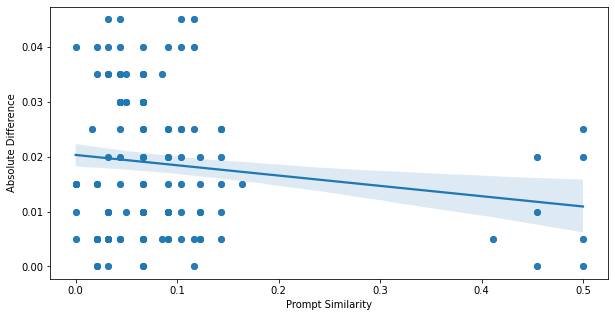

openbookqa ('gpt2-large', 'within_task_random', 'in_context')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 5551.69it/s]


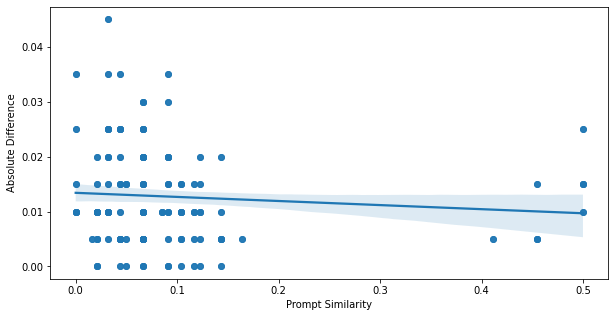

codah ('gpt2-large', 'within_task_random', 'in_context')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 5649.53it/s]


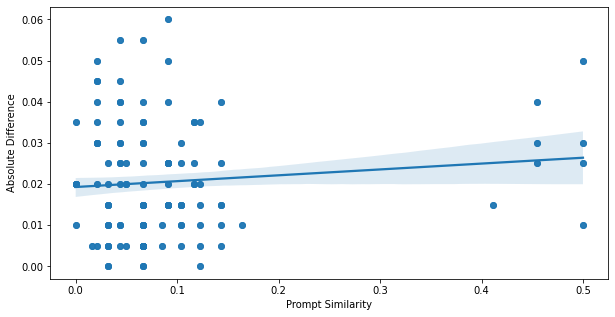

In [6]:
tasks = set(df.task)
descriptors = set(df.descriptor)
for task in tasks:
    for descriptor in descriptors:
        print(task, descriptor)
        temp = df[(df.task == task) & (df.descriptor == descriptor) & (df.k >= 16)].reset_index()
        if len(temp) < 2:
            continue
        temp['index'] = temp.index
        pairs = temp.merge(temp, how='cross')
        pairs = pairs[(pairs.index_x != pairs.index_y)]
        pairs[['Absolute Difference', 'Prompt Similarity']] = pairs.progress_apply(
            lambda r: [
                abs(r.result_x - r.result_y),
                len(set(eval(r.train_indices_x)).intersection(set(eval(r.train_indices_y)))) \
                    / len(set(eval(r.train_indices_x)).union(set(eval(r.train_indices_y)))),
            ], axis=1, result_type='expand')
        plt.figure(figsize=(10,5))
        sns.regplot(data=pairs, x='Prompt Similarity', y='Absolute Difference')
        plt.show()
#         break
#     break

### Average scores for each model on each task

In [7]:
task_order = list(completed_tasks_df.index)
for model in list(set(df['descriptor'])):
    print(model)
    plt.figure(figsize=(16, 8))
    data = df[(df.descriptor == model) & (df.k == 0)]
    chart = sns.barplot(data=data.groupby('task').mean().reset_index(), x='task', y='result', order=task_order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
#     sns.violinplot(data=data, x='task', y='result')
    plt.show()
for model in list(set(df['descriptor'])):
    print(model)
    plt.figure(figsize=(16, 8))
    data = df[(df.descriptor == model) & (df.k == 32)]
    chart = sns.violinplot(data=data, x='task', y='result', order=task_order)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
    plt.show()

NameError: name 'completed_tasks_df' is not defined

### For each task, let's plot the distributions over the scores for the various prompts separated out by the number of examples in the prompts and the model/checkpoint used.

ai2_arc


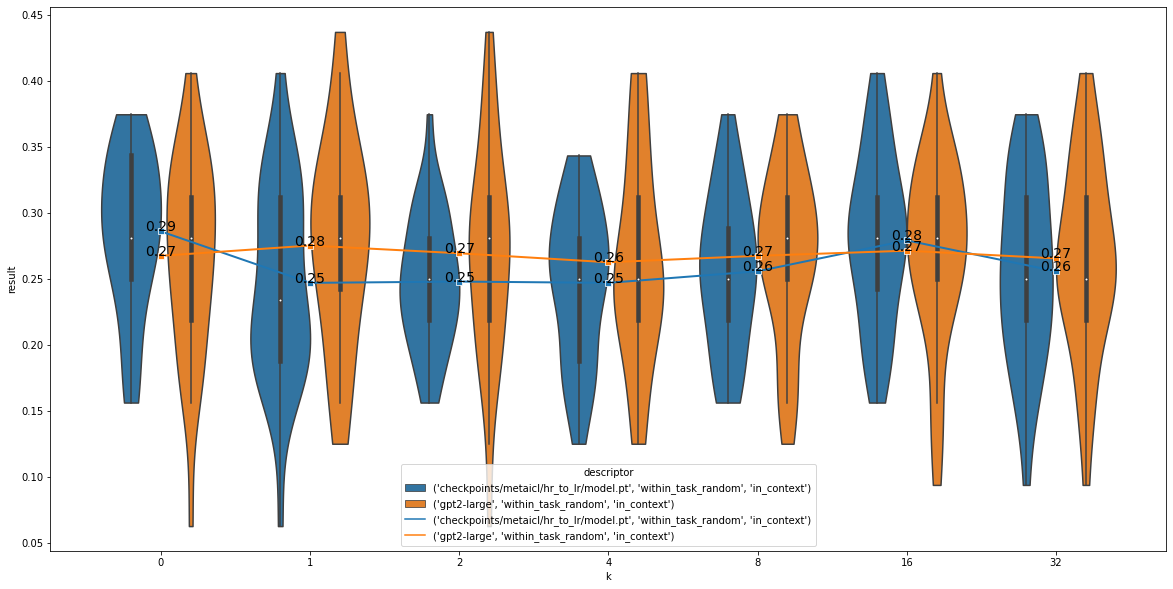

climate_fever


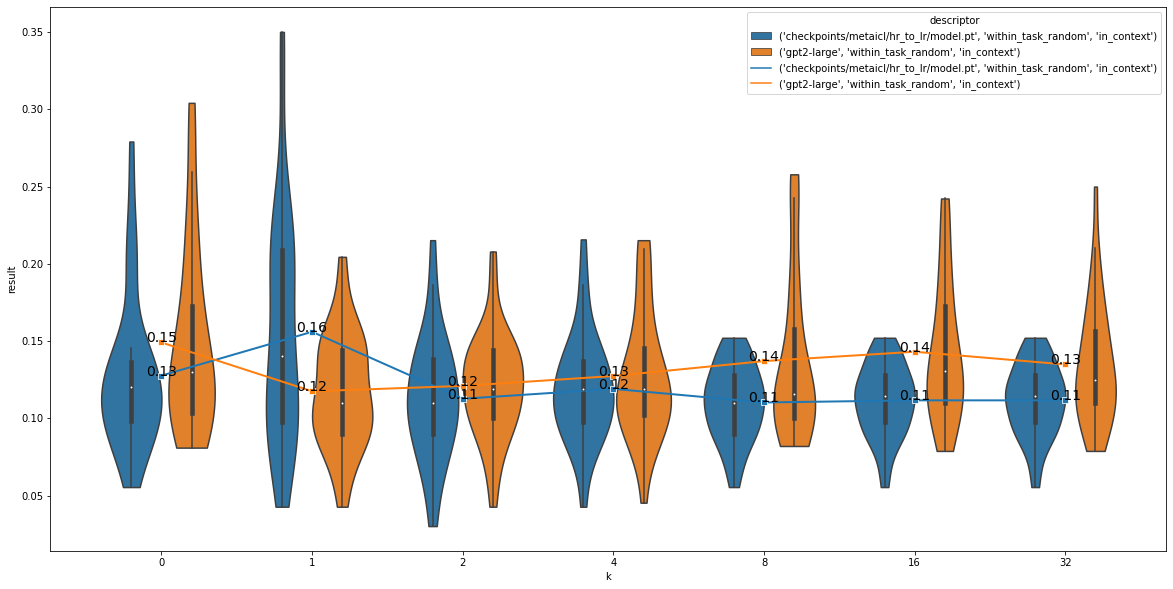

codah


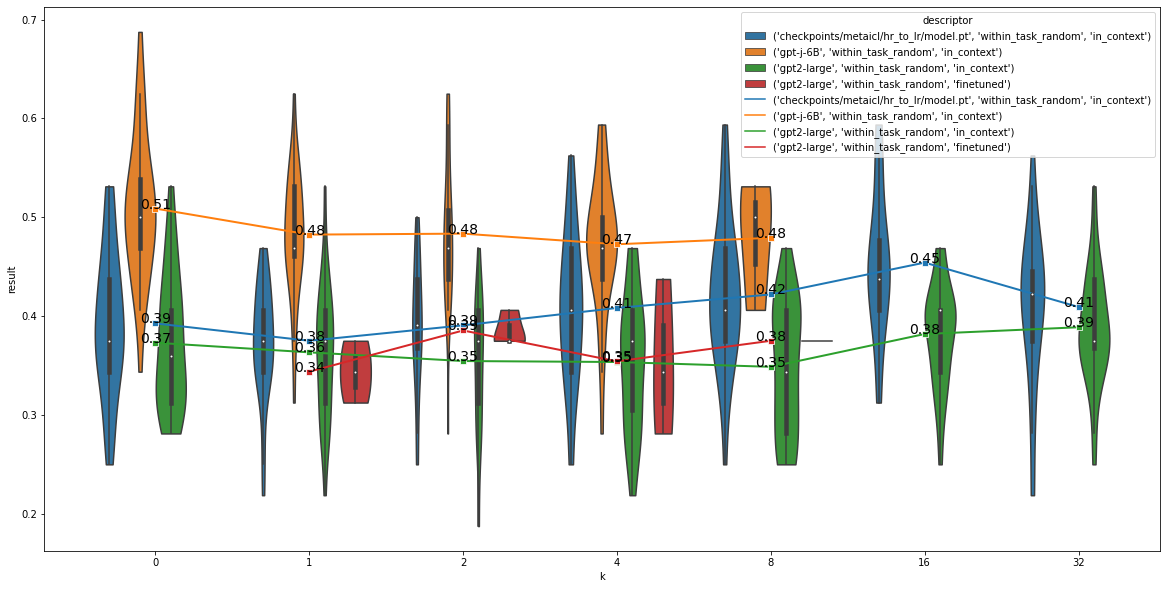

commonsense_qa


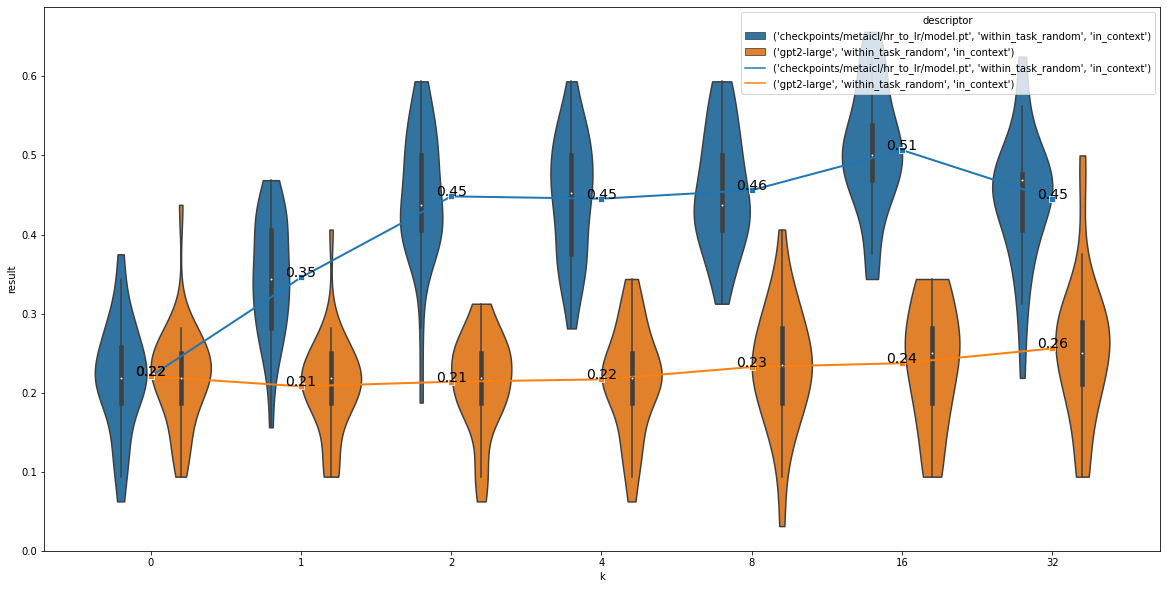

dream


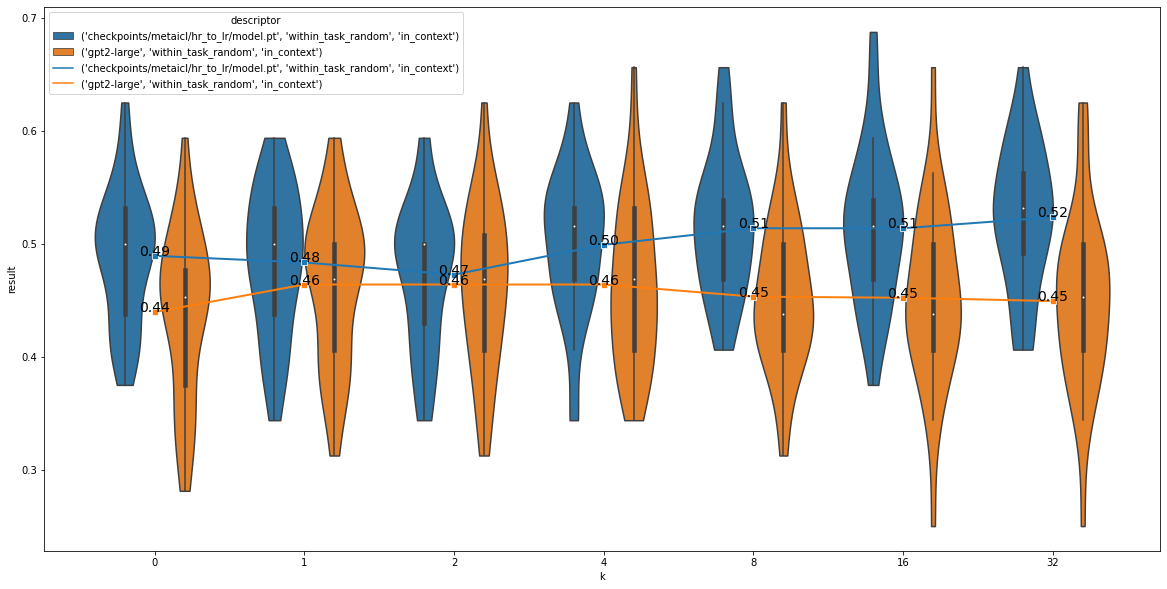

ethos-national_origin


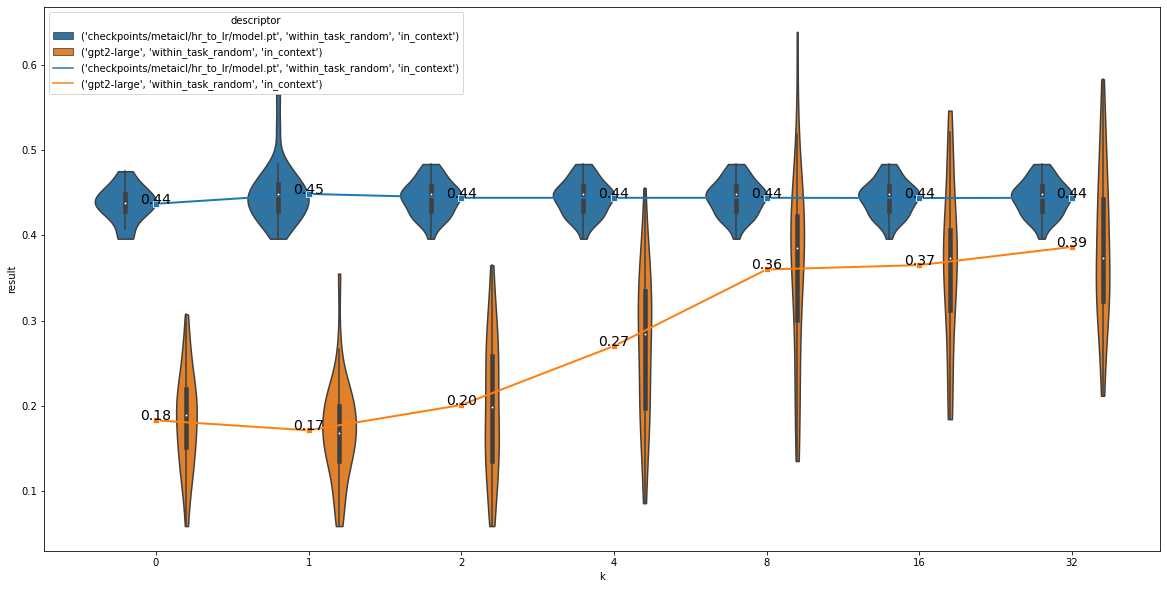

ethos-race


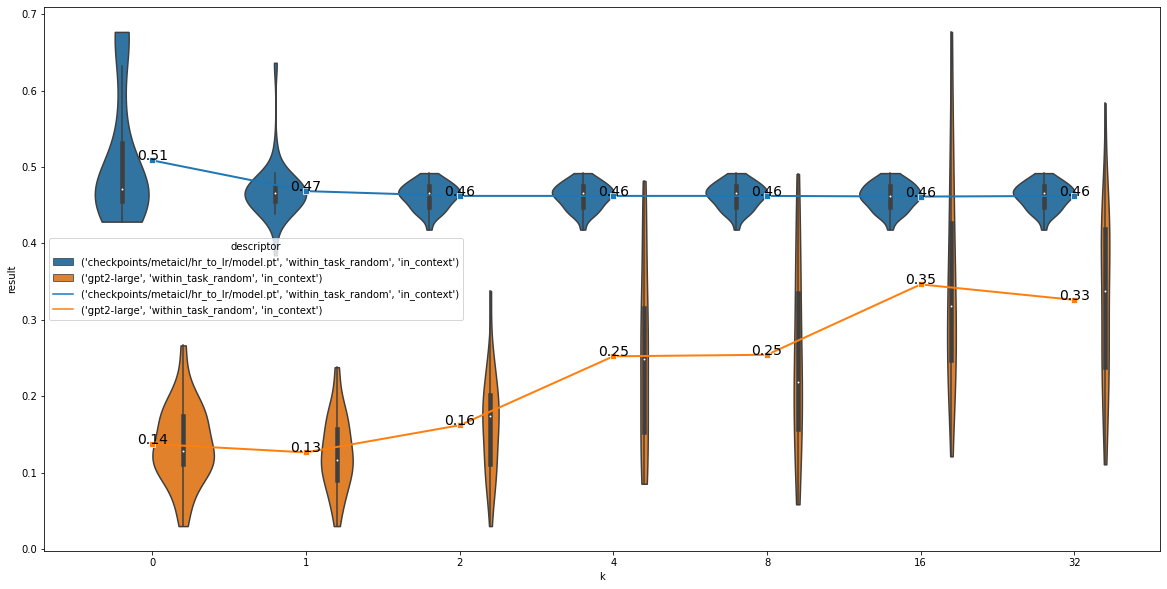

ethos-religion


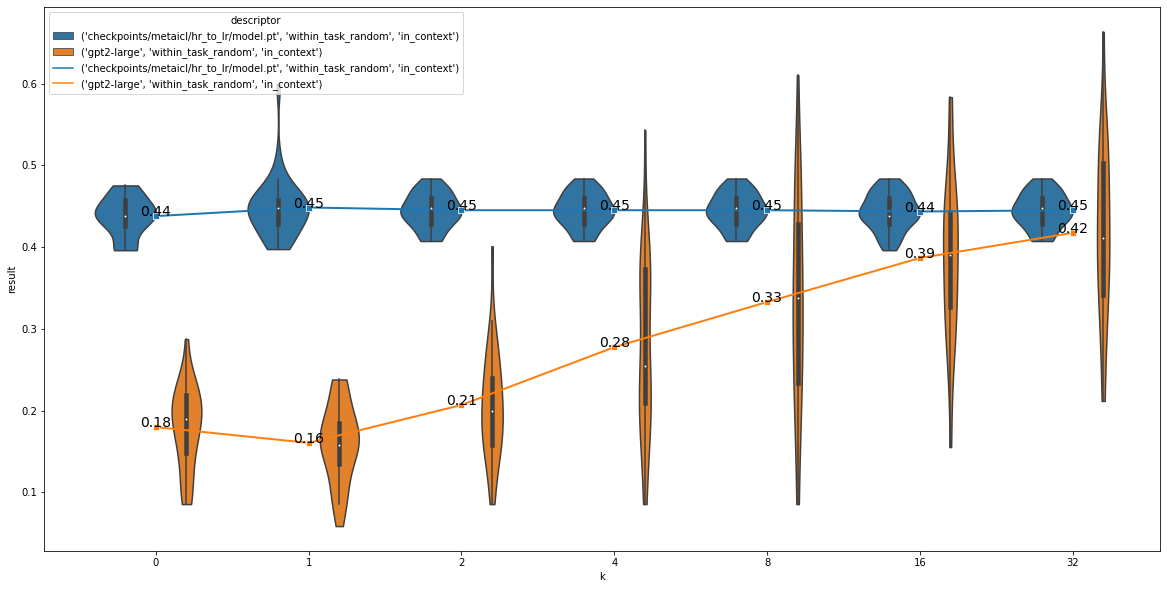

glue-mrpc


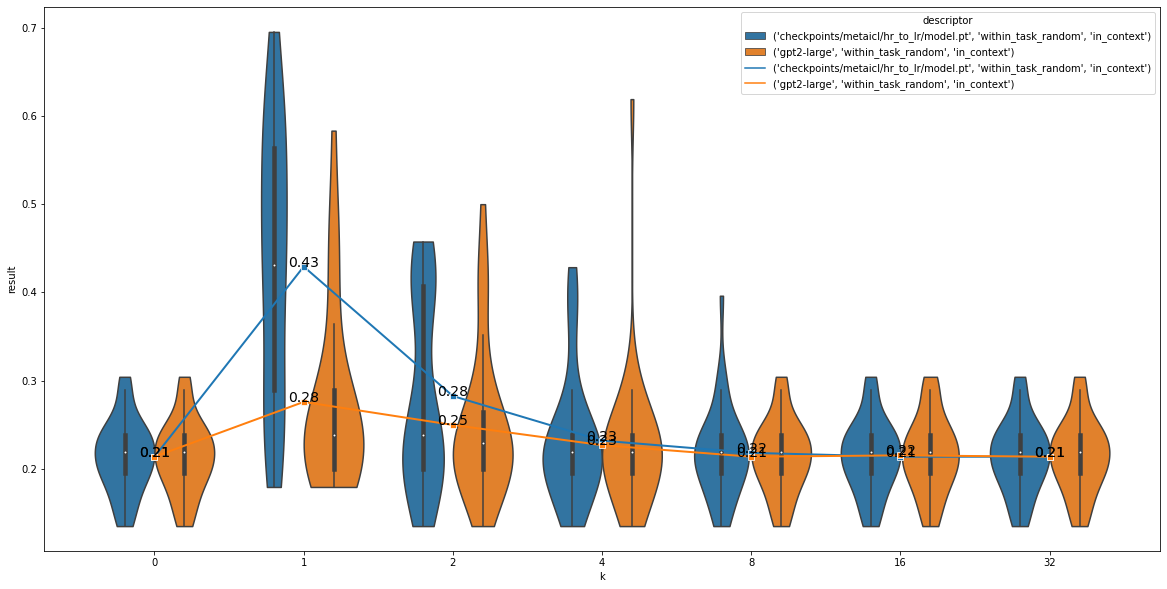

glue-rte


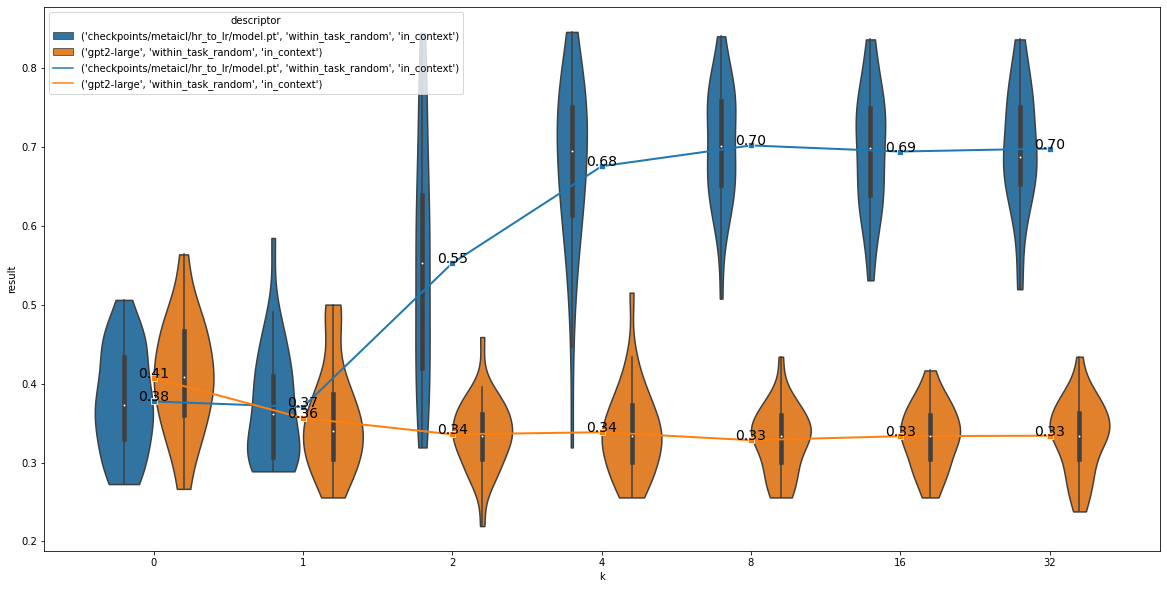

glue-wnli


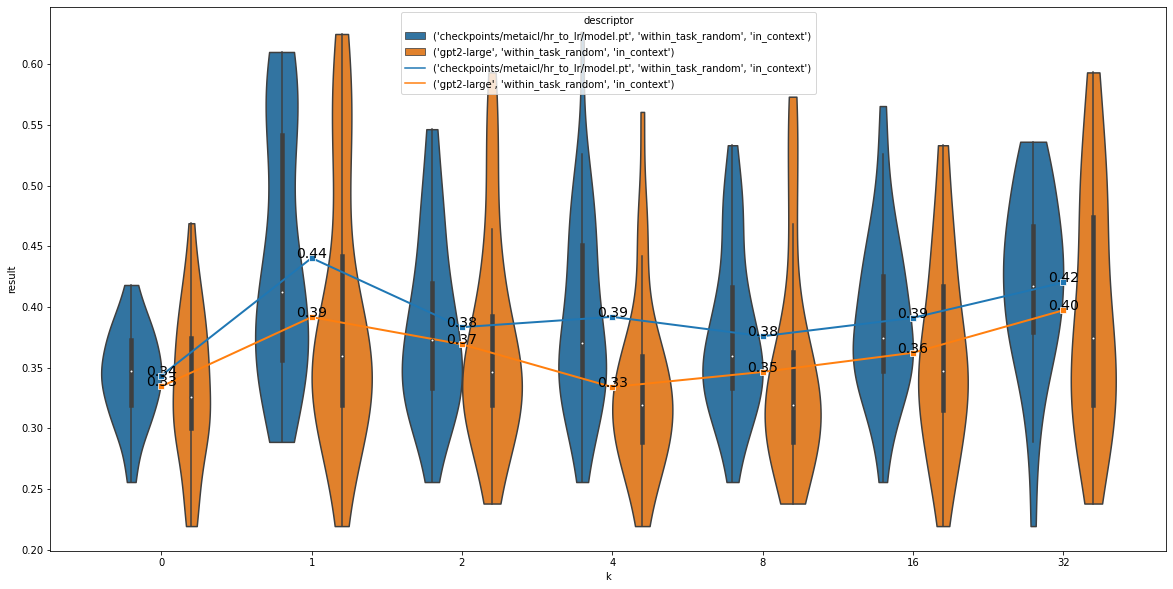

hate_speech18


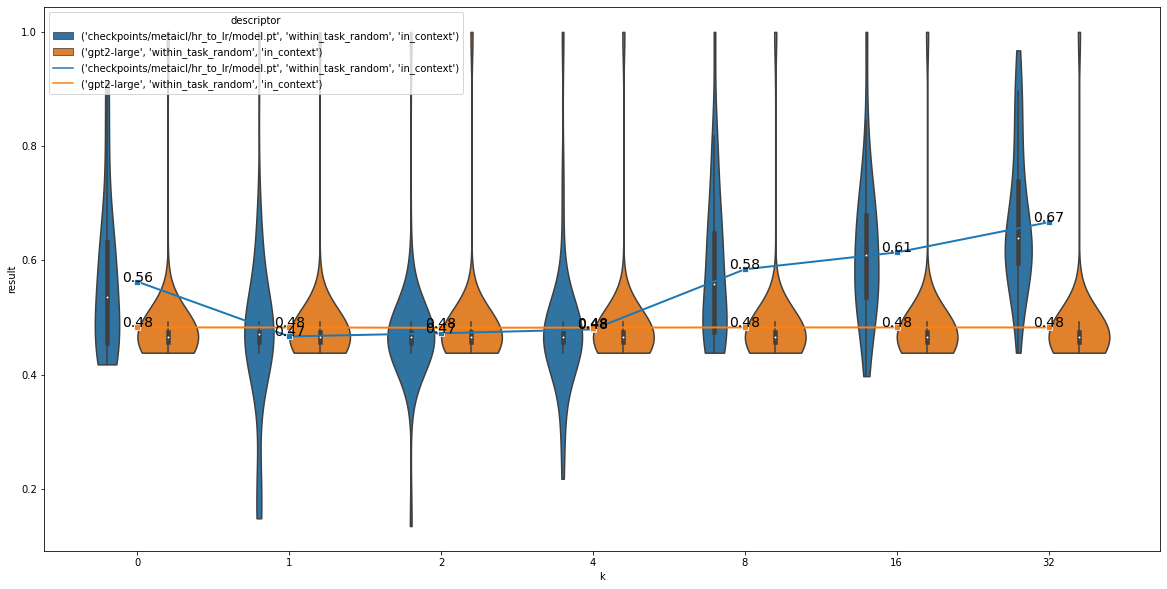

medical_questions_pairs


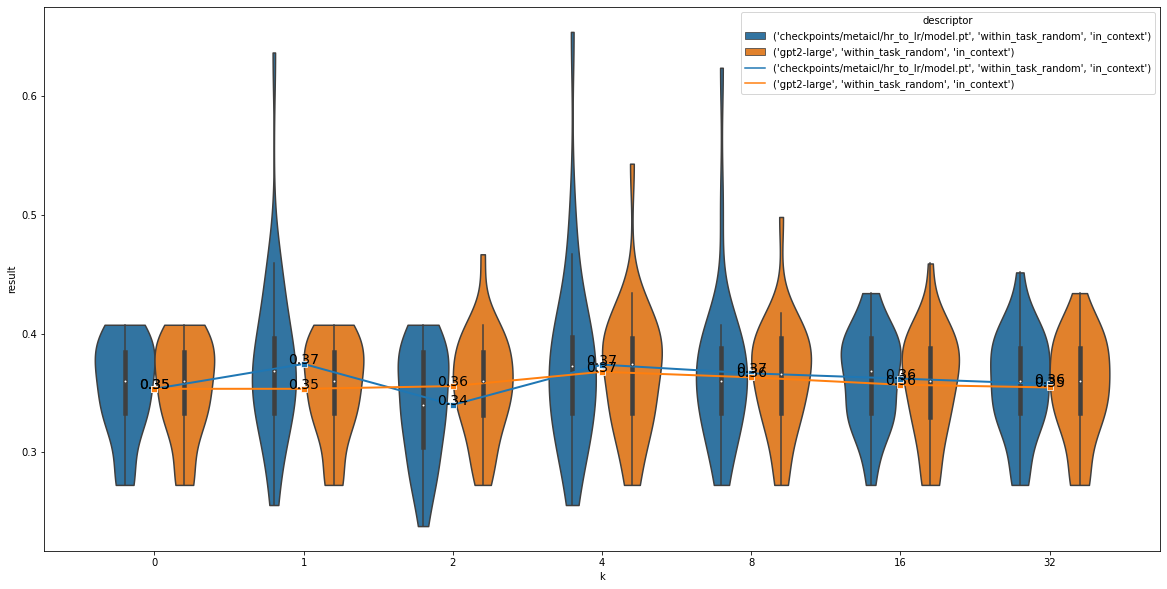

openbookqa


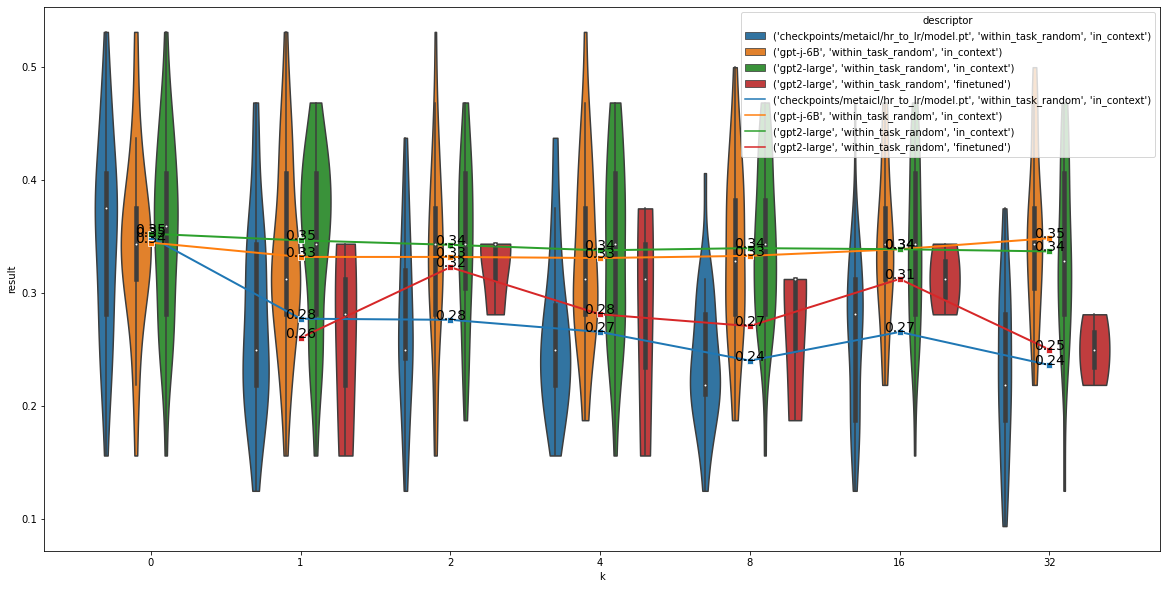

poem_sentiment


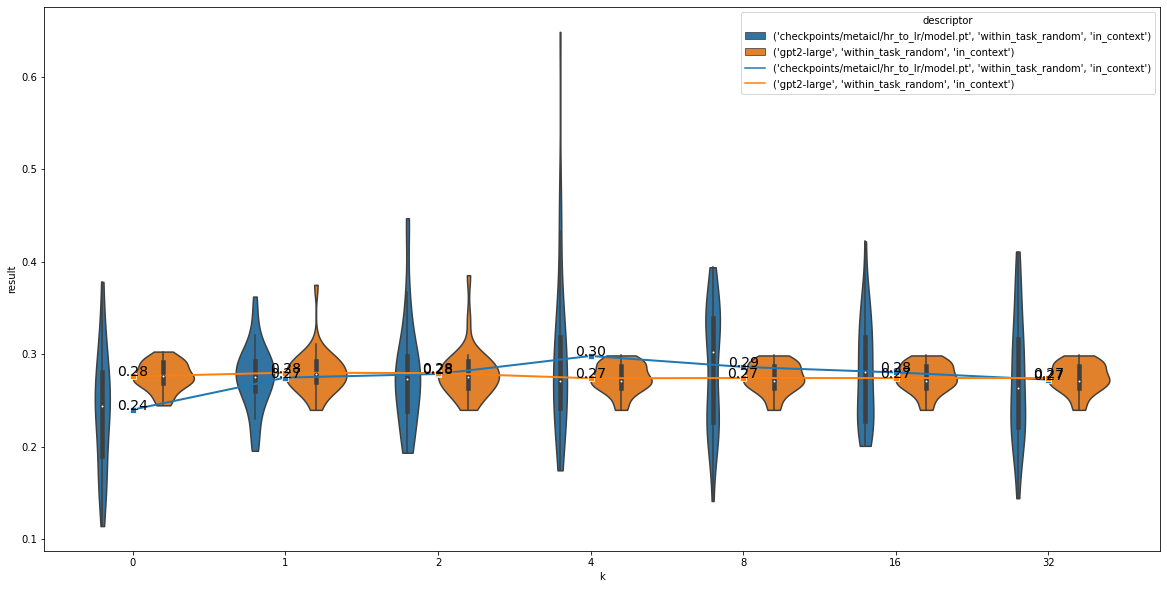

qasc


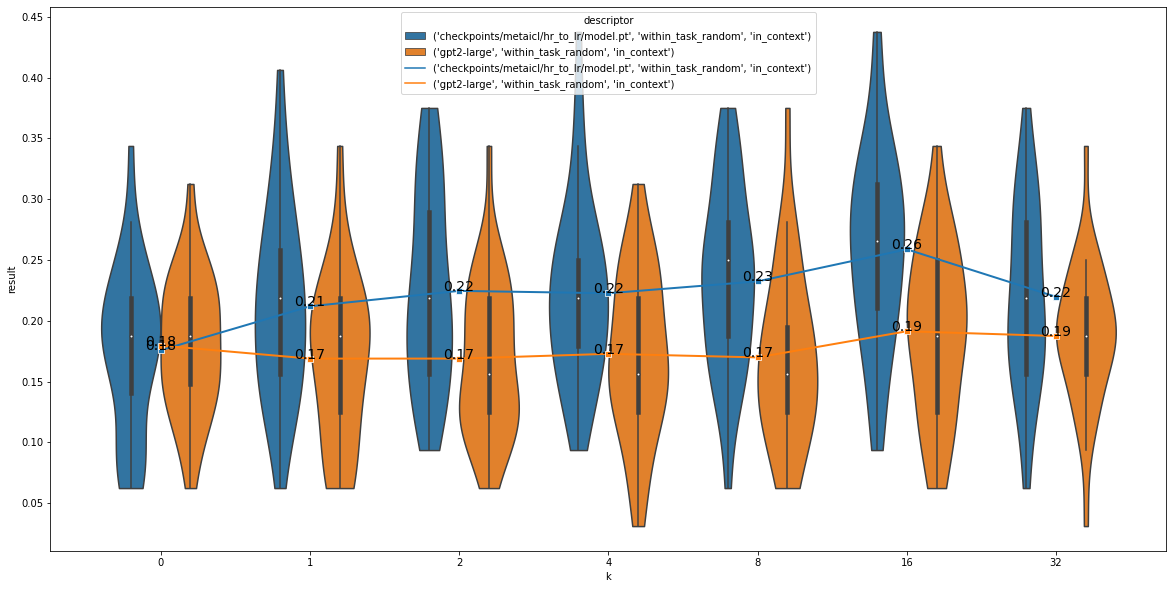

quarel


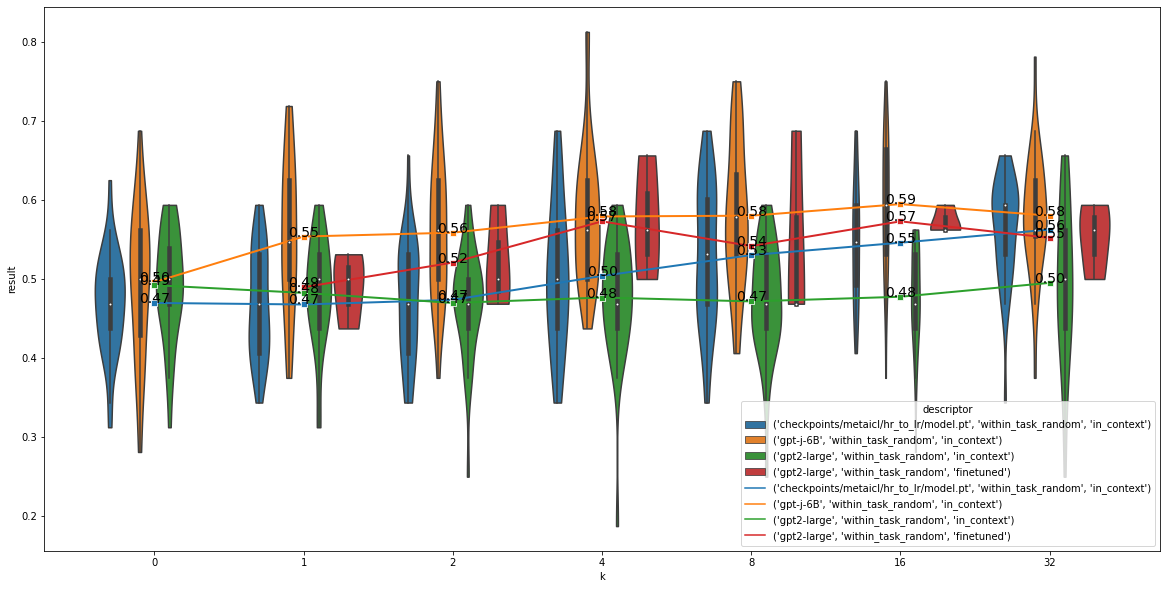

quartz-no_knowledge


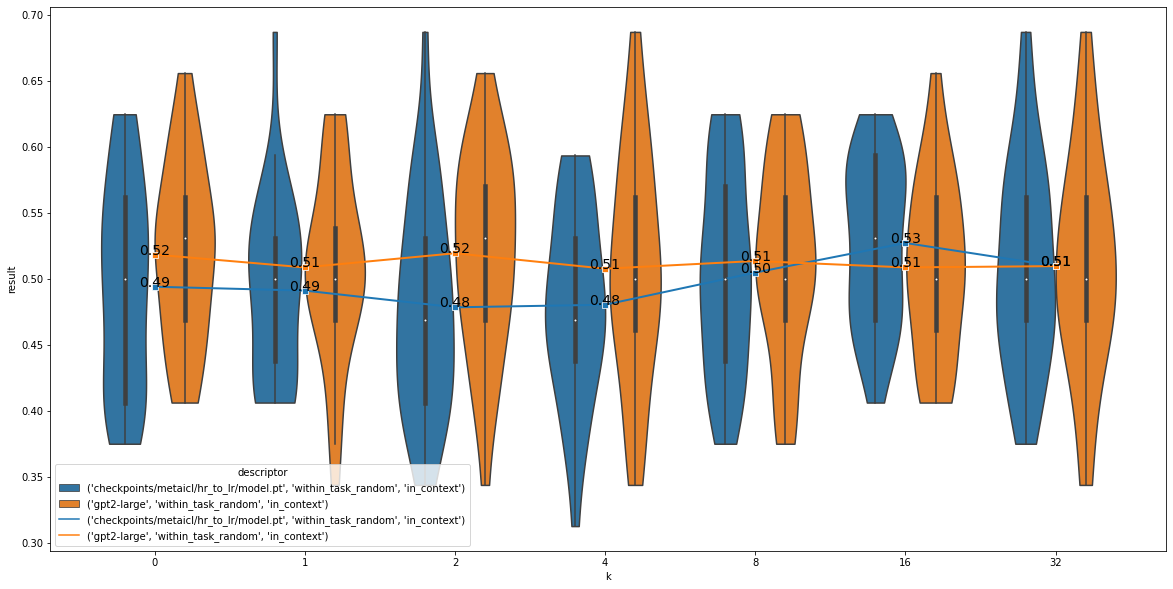

quartz-with_knowledge


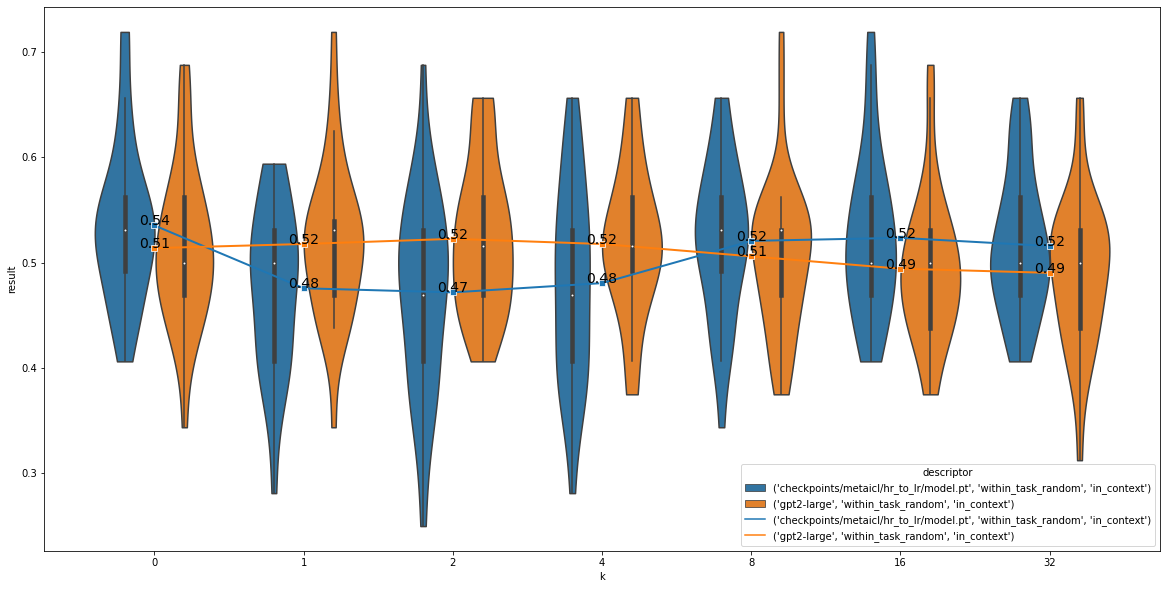

sick


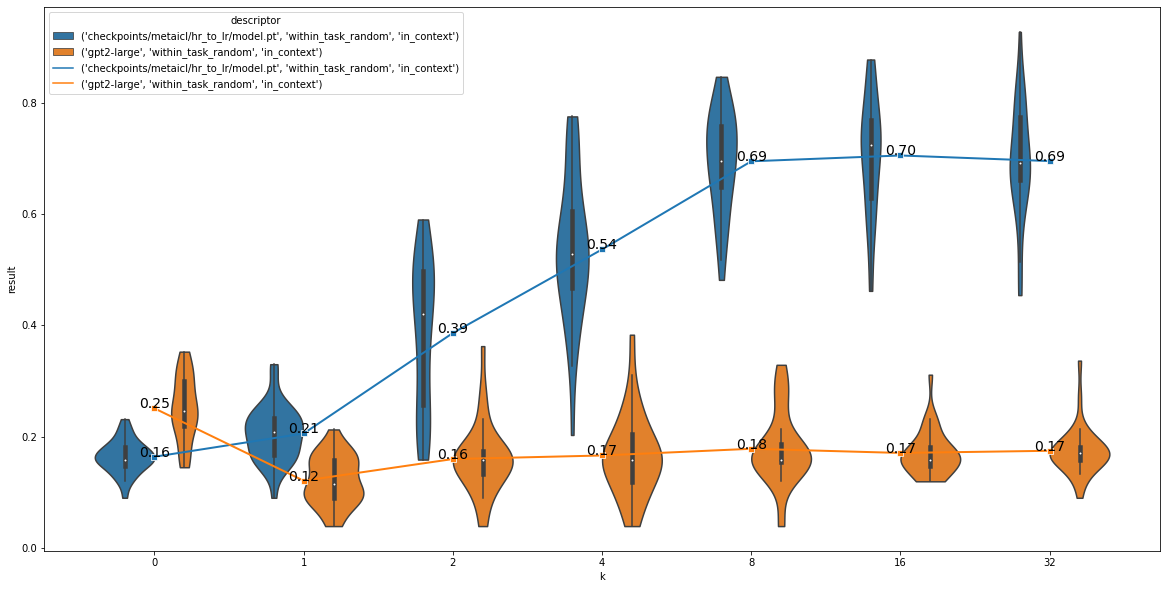

superglue-cb


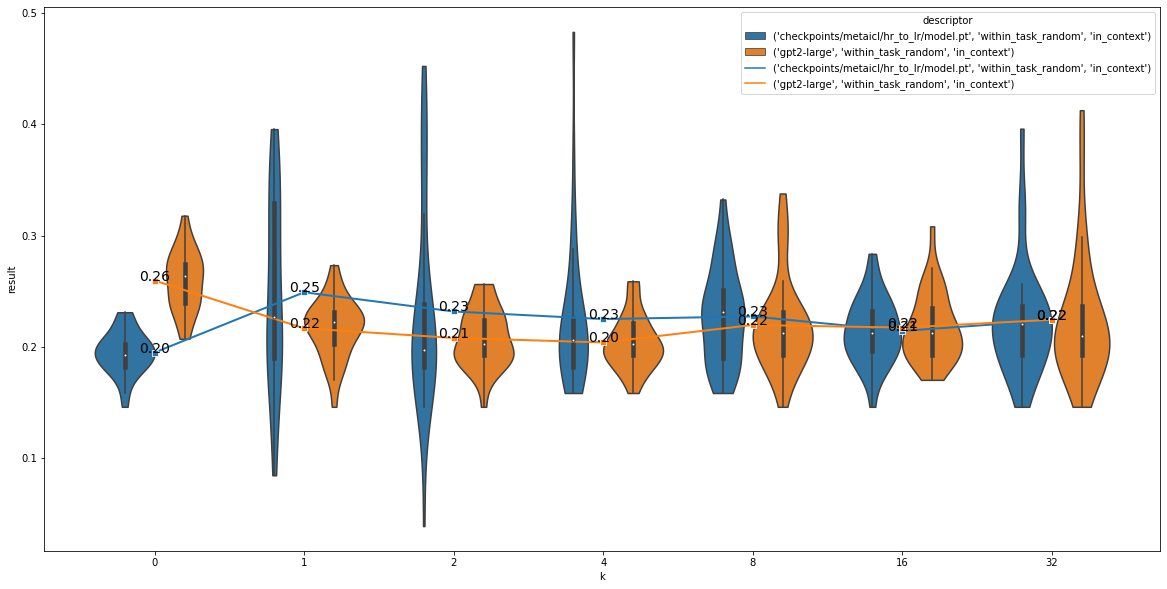

superglue-copa


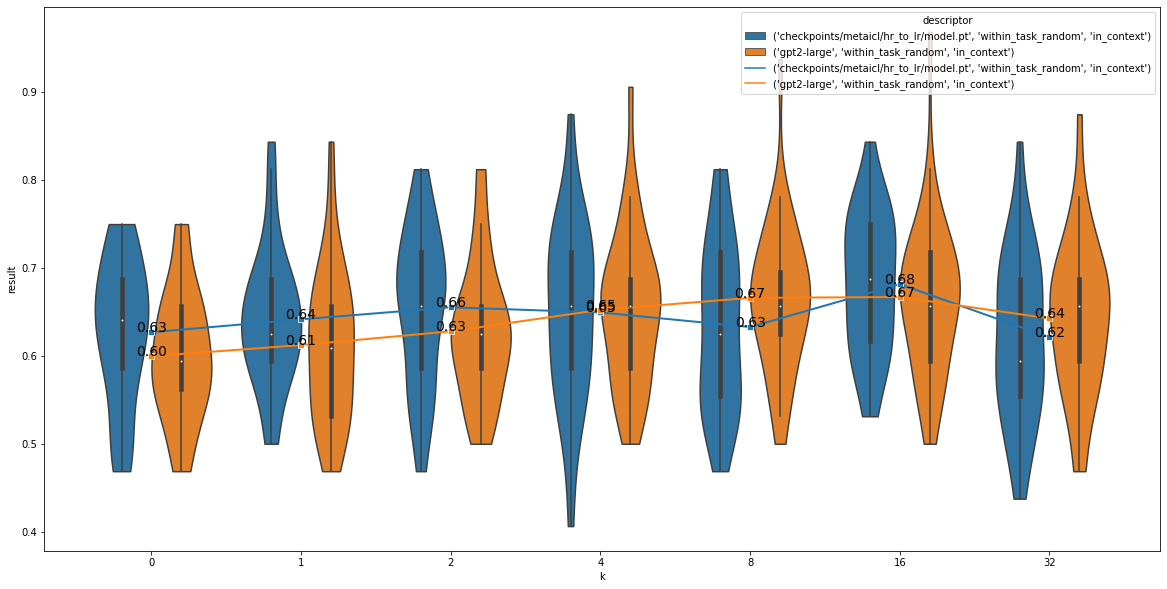

tweet_eval-hate


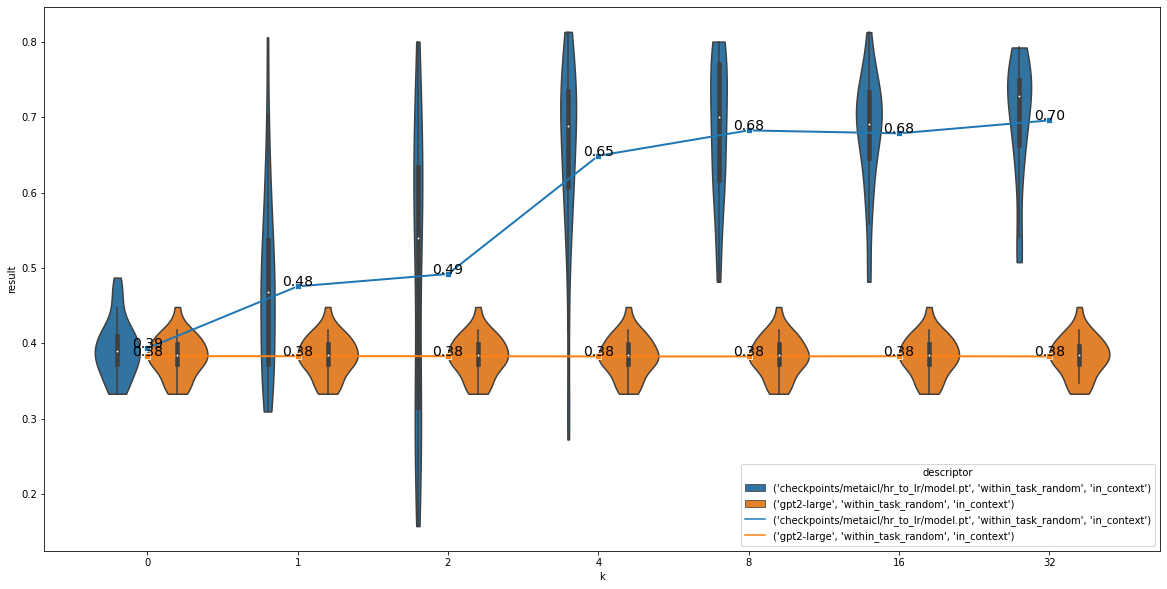

tweet_eval-stance_atheism


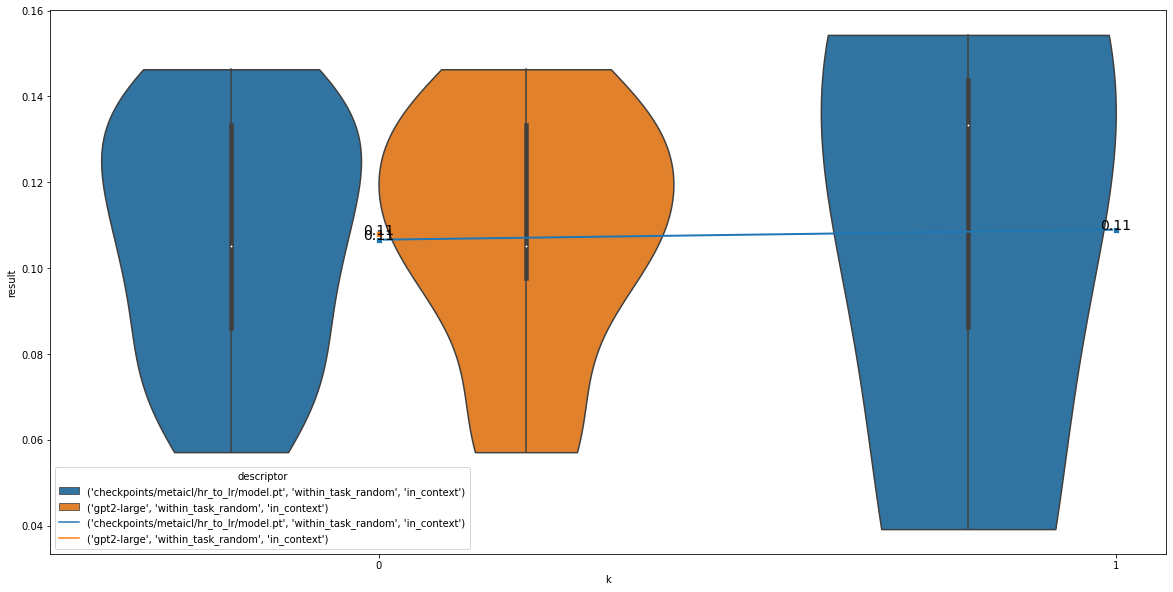

In [34]:


def violinplot_custom(data, order=None, **kwargs):
    if order is None:
        order = list(set(data[kwargs['hue']]))
    data = pd.concat([data[data[kwargs['hue']] == hue] for hue in order])
    mean_data = data.groupby([kwargs['hue'], kwargs['x']]).mean().reset_index()
    mean_data = pd.concat([mean_data[mean_data[kwargs['hue']] == hue] for hue in order])
    chart = sns.violinplot(data=data, **kwargs)
    axis = chart.axis()
    chart = sns.lineplot(data=mean_data, x=kwargs['x_scatter'], y=kwargs['y'], hue=kwargs['hue'], ax=chart, color='black', marker='s', linewidth=2)
    for hue in order:
        for i, (_, row) in enumerate(mean_data[mean_data[kwargs['hue']] == hue].iterrows()):
            chart.annotate('%.2f' % row[kwargs['y']], xy=(row[kwargs['x_scatter']], row[kwargs['y']]), horizontalalignment='center', color='black', fontsize=14)

for task in sorted(list(set(df.task))):
    print(task)
    plt.figure(figsize=(20, 10))
#     sns.violinplot(data=df[df.task == task], x='k', y='result', hue=df[df.task == task][['checkpoint', 'sampling']].apply(tuple, axis=1))
    violinplot_custom(df[df.task == task], x='k', x_scatter='k_scatter', y='result', hue='descriptor', cut=0)
    plt.show()
#     plt.savefig(os.path.join('results_dir', 'accuracy_dists_%s.pdf' % ck))

['codah', 'openbookqa', 'quarel']


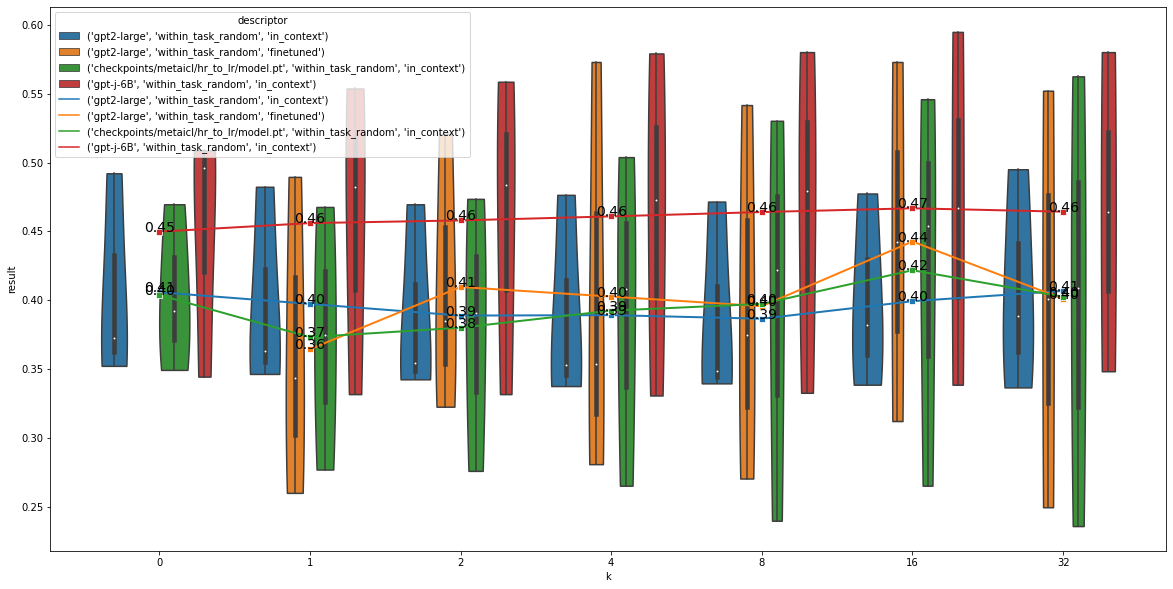

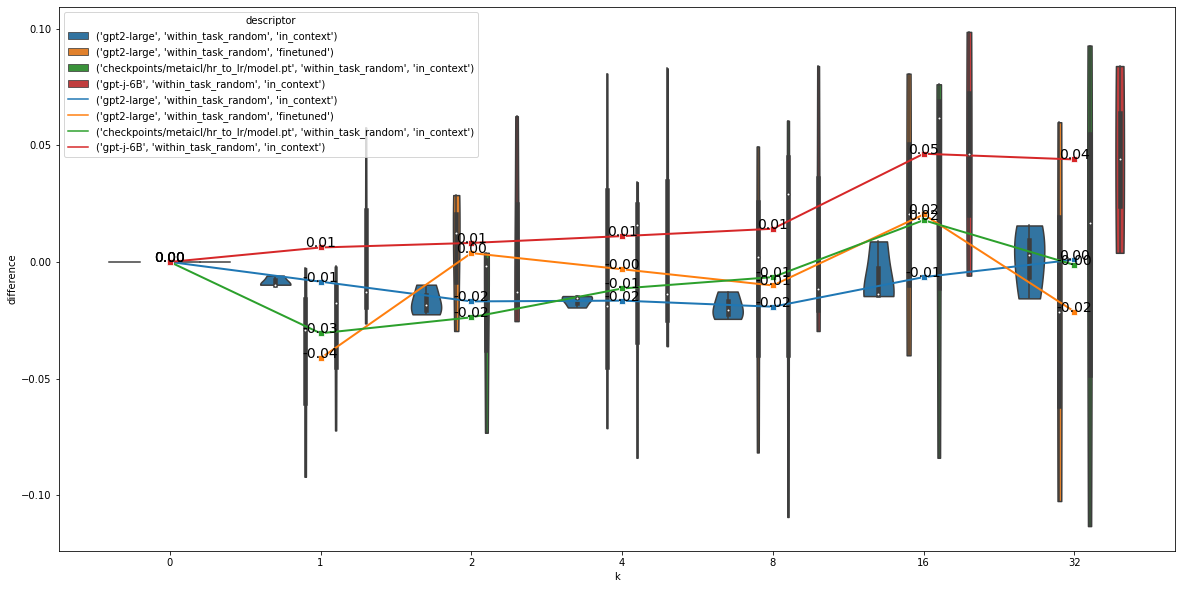

task   k  checkpoint            sampling      method  \
2    codah   0  gpt2-large  within_task_random  in_context   
5    codah   1  gpt2-large  within_task_random   finetuned   
6    codah   1  gpt2-large  within_task_random  in_context   
9    codah   2  gpt2-large  within_task_random   finetuned   
10   codah   2  gpt2-large  within_task_random  in_context   
..     ...  ..         ...                 ...         ...   
58  quarel   2    gpt-j-6B  within_task_random  in_context   
62  quarel   4    gpt-j-6B  within_task_random  in_context   
66  quarel   8    gpt-j-6B  within_task_random  in_context   
70  quarel  16    gpt-j-6B  within_task_random  in_context   
74  quarel  32    gpt-j-6B  within_task_random  in_context   

                                      descriptor  prompt_seed    result  \
2   (gpt2-large, within_task_random, in_context)         15.5  0.373047   
5    (gpt2-large, within_task_random, finetuned)          1.0  0.343750   
6   (gpt2-large, within_task_random, in_context)         15.5  0.363281   
9    (gpt2-large, within_task_random, finetuned)          1.0  0.385417   
10  (gpt2-large, within_task_random, in_context)         15.5  0.354492   
..                                           ...          ...       ...   
58    (gpt-j-6B, within_task_random, in_context)         15.5  0.558594   
62    (gpt-j-6B, within_task_random, in_context)         15.5  0.579102   
66    (gpt-j-6B, within_task_random, in_context)         15.5  0.580078   
70    (gpt-j-6B, within_task_random, in_context)         15.5  0.594727   
74    (gpt-j-6B, within_task_random, in_context)         15.5  0.580078   

    k_scatter  difference  
2         0.0    0.000000  
5         1.0   -0.029297  
6         1.0   -0.009766  
9         2.0    0.012370  
10        2.0   -0.018555  
..        ...         ...  
58        2.0    0.062500  
62        3.0    0.083008  
66        4.0    0.083984  
70        5.0    0.098633  
74        6.0    0.083984  

[77 rows x 10 columns]

In [36]:
# average over the tasks completed on all models/sampling methods
descriptors = [
    ('gpt2-large', 'within_task_random', 'in_context'),
    ('gpt2-large', 'within_task_random', 'finetuned'),
#     ('gpt2-large', 'random_wrong_tasks'),
#     ('gpt2-large', 'uncertainty_sampling'),
#     ('gpt2-large', 'uncertainty_sampling_top32'),
    ('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random', 'in_context'),
    ('gpt-j-6B', 'within_task_random', 'in_context'),
]
tasks = get_common_completed_tasks(descriptors)
print(tasks)
temp_df = df[df.apply(lambda r: r.task in tasks and (r.checkpoint, r.sampling, r.method) in descriptors, axis=1)]
temp_df = temp_df.groupby(['task', 'k', 'checkpoint', 'sampling', 'method', 'descriptor']).mean().reset_index()
temp_df = pd.concat([
    temp_df[temp_df.checkpoint == 'gpt2-large'],
    temp_df[temp_df.checkpoint == 'checkpoints/metaicl/hr_to_lr/model.pt'],
    temp_df[temp_df.checkpoint == 'gpt-j-6B'],
])
plt.figure(figsize=(20, 10))
# sns.violinplot(data=temp_df, x='k', y='result', hue=temp_df[['checkpoint', 'sampling']].apply(tuple, axis=1))
violinplot_custom(temp_df, x='k', x_scatter='k_scatter', y='result', hue='descriptor', order=descriptors, cut=0)
plt.show()
temp_df['difference'] = temp_df.apply(
    lambda r: r.result - temp_df[(temp_df.descriptor == (*r.descriptor[:2], 'in_context')) & (temp_df.task == r.task) & (temp_df.k == 0)].iloc[0].result, axis=1)
plt.figure(figsize=(20, 10))
violinplot_custom(temp_df, x='k', x_scatter='k_scatter', y='difference', hue='descriptor', order=descriptors, cut=0)
plt.show()
temp_df

In [6]:

# task_corrs = {}
task_k_corrs = []
task_checkpoint_corrs = []
samplings = ['within_task_random', 'random_wrong_tasks', 'uncertainty_sampling', 'uncertainty_sampling_top32']
for task in set(df.task):
    checkpoints = sorted(list(set(df[df.task == task].checkpoint)))
    for ch in checkpoints:
        for sampling in samplings:
            selected_rows = df[(df.task == task) & (df.checkpoint == ch) & (df.sampling == sampling)]
            task_k_corrs.append({
                'task': task,
                'sampling': sampling,
                'checkpoint': ch,
                'k_corr': selected_rows.k.corr(selected_rows.result),
            })
    selected_rows = df[(df.task == task)]
    task_k_corrs.append({
        'task': task,
        'k_corr': selected_rows.k.corr(selected_rows.result),
    })
for task in set(df.task):
    checkpoints = sorted(list(set(df[df.task == task].checkpoint)))
    for i, ch1 in enumerate(checkpoints[:-1]):
        for s1 in samplings:
            ch1_results = df[(df.task==task) & (df.checkpoint==ch1) & (df.sampling == s1)].reset_index().result
            if len(ch1_results) == 0:
                continue
            for ch2 in checkpoints[i + 1:]:
                s2 = s1
                ch2_results = df[(df.task==task) & (df.checkpoint==ch2) & (df.sampling == s2)].reset_index().result
                if len(ch2_results) == 0:
                    continue
                corr = ch1_results.corr(ch2_results)
                (ch1, s1), (ch2, s2) = sorted([(ch1, s1), (ch2, s2)])
                name = ((ch1, s1), (ch2, s2))
                selected_rows = df[(df.task == task) & (
                    ((df.checkpoint == ch1) & (df.sampling == s1)) | 
                    ((df.checkpoint == ch2) & (df.sampling == s2))
                )]
                k_corr = selected_rows.k.corr(selected_rows.result)
                task_checkpoint_corrs.append({
                    'task': task,
                    'between_ckpts': name,
                    'ckpt_corr': corr,
                    'k_corr': k_corr,
                })
task_k_corrs = pd.DataFrame(task_k_corrs)
task_checkpoint_corrs = pd.DataFrame(task_checkpoint_corrs)

In [7]:
task_k_corrs

task                    sampling  \
0   glue-mrpc          within_task_random   
1   glue-mrpc          random_wrong_tasks   
2   glue-mrpc        uncertainty_sampling   
3   glue-mrpc  uncertainty_sampling_top32   
4   glue-mrpc          within_task_random   
..        ...                         ...   
67      codah          within_task_random   
68      codah          random_wrong_tasks   
69      codah        uncertainty_sampling   
70      codah  uncertainty_sampling_top32   
71      codah                         NaN   

                               checkpoint    k_corr  
0   checkpoints/metaicl/hr_to_lr/model.pt -0.124808  
1   checkpoints/metaicl/hr_to_lr/model.pt       NaN  
2   checkpoints/metaicl/hr_to_lr/model.pt       NaN  
3   checkpoints/metaicl/hr_to_lr/model.pt       NaN  
4                              gpt2-large  0.088379  
..                                    ...       ...  
67                             gpt2-large  0.729738  
68                             gpt2-large       NaN  
69                             gpt2-large       NaN  
70                             gpt2-large       NaN  
71                                    NaN  0.332695  

[72 rows x 4 columns]

In [8]:
task_checkpoint_corrs

task                                      between_ckpts  \
0                glue-mrpc  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
1               openbookqa  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
2               openbookqa  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
3               openbookqa  ((gpt-j-6B, within_task_random), (gpt2-large, ...   
4                     qasc  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
5  medical_questions_pairs  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
6                   quarel  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
7                   quarel  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   
8                   quarel  ((gpt-j-6B, within_task_random), (gpt2-large, ...   
9                    codah  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...   

   ckpt_corr    k_corr  
0   0.245476  0.074724  
1   0.089942 -0.500712  
2   0.168426 -0.156455  
3   0.165819 -0.154952  
4   0.283359  0.189394  
5   0.144768 -0.143855  
6   0.342152  0.305748  
7   0.129013  0.304109  
8   0.194997  0.052092  
9   0.197052  0.332695

### For the each of the tasks, what is the correlation between two different models' scores across the same prompts.

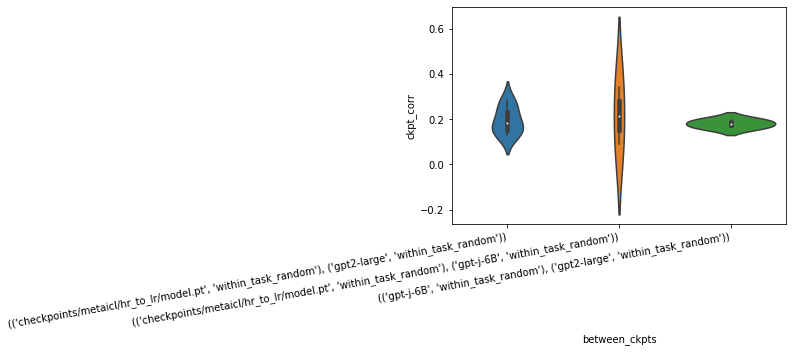

In [9]:
chart = sns.violinplot(data=task_checkpoint_corrs, x='between_ckpts', y='ckpt_corr')
# chart = sns.violinplot(data=task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts=='checkpoints/metaicl/hr_to_lr/model.pt gpt2-large'], x='between_ckpts', y='ckpt_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=10, horizontalalignment='right')
None


(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt-j-6B', 'within_task_random'))


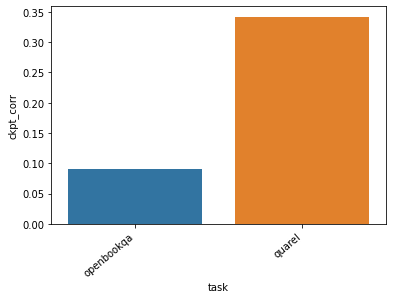

(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt2-large', 'within_task_random'))


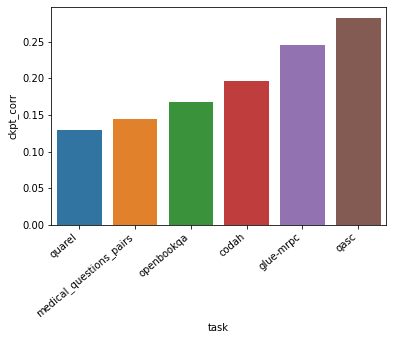

(('gpt-j-6B', 'within_task_random'), ('gpt2-large', 'within_task_random'))


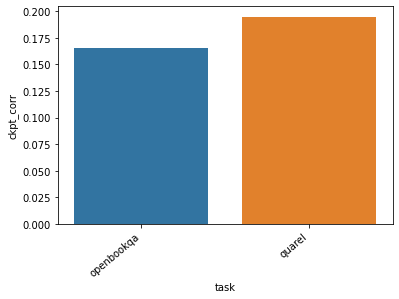

In [10]:
for between_ckpts in sorted(set(task_checkpoint_corrs.between_ckpts)):
    print(between_ckpts)
    chart = sns.barplot(
        data=task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts==between_ckpts].sort_values('ckpt_corr'),
        x='task', y='ckpt_corr')
    chart.set_xticklabels(chart.get_xticklabels(), rotation=40, horizontalalignment='right')
    plt.show()


### For each task, what is the correlation between number of examples in the prompt and the score? In other words, how few-shot-learnable is a task?

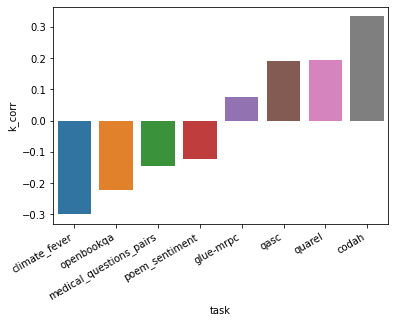

In [11]:
chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint.isna()].sort_values('k_corr'), x='task', y='k_corr')
# chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint == 'checkpoints/metaicl/hr_to_lr/model.pt'].sort_values('k_corr'), x='task', y='k_corr')
# chart = sns.barplot(data=task_k_corrs[task_k_corrs.checkpoint == 'gpt2-large'].sort_values('k_corr'), x='task', y='k_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right')
None


### Is the correlation of the scores for different models on a task correlated with how much the task benefits from examples?

In [12]:
# rows = task_checkpoint_corrs
for between_ckpts in sorted(set(task_checkpoint_corrs.between_ckpts)):
    print(between_ckpts)
    rows = task_checkpoint_corrs[task_checkpoint_corrs.between_ckpts==between_ckpts]
    print(rows.ckpt_corr.corr(rows.k_corr))


(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt-j-6B', 'within_task_random'))
0.9999999999999998
(('checkpoints/metaicl/hr_to_lr/model.pt', 'within_task_random'), ('gpt2-large', 'within_task_random'))
0.19778207686944874
(('gpt-j-6B', 'within_task_random'), ('gpt2-large', 'within_task_random'))
1.0


### What does the distribution of few-shot-learnability (correlation of # of examples with score) over tasks for each model look like?

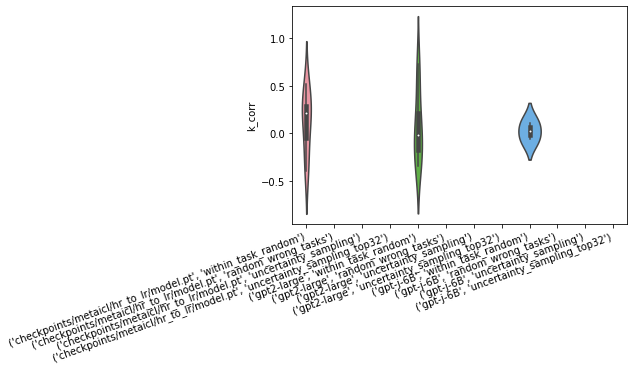

In [13]:
chart = sns.violinplot(
    data=task_k_corrs[~task_k_corrs.checkpoint.isna()],
    x=task_k_corrs[~task_k_corrs.checkpoint.isna()][['checkpoint', 'sampling']].apply(tuple, axis=1),
    y='k_corr')
chart.set_xticklabels(chart.get_xticklabels(), rotation=20, horizontalalignment='right')
None

### If a task is few-shot-learnable for one model, does that mean it will be for a different model?

In [14]:
ckpts = sorted(list(set(task_k_corrs[~task_k_corrs.checkpoint.isna()].checkpoint)))
samplings = ['within_task_random']
model_k_corr_corrs = []
for i, ch1 in enumerate(ckpts[:-1]):
    for s1 in samplings:
        for ch2 in ckpts[i + 1:]:
            s2 = s1
            (ch1, s1), (ch2, s2) = sorted([(ch1, s1), (ch2, s2)])
            name = ((ch1, s1), (ch2, s2))
            k_corr_1 = task_k_corrs[(task_k_corrs.checkpoint == ch1) & (task_k_corrs.sampling == s1)].sort_values('task').reset_index().k_corr
            k_corr_2 = task_k_corrs[(task_k_corrs.checkpoint == ch2) & (task_k_corrs.sampling == s2)].sort_values('task').reset_index().k_corr
            model_k_corr_corrs.append({
                'between_ckpts': name,
                'k_corr_corr': k_corr_1.corr(k_corr_2),
            })
model_k_corr_corrs = pd.DataFrame(model_k_corr_corrs)
model_k_corr_corrs

between_ckpts  k_corr_corr
0  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...    -1.000000
1  ((checkpoints/metaicl/hr_to_lr/model.pt, withi...    -0.398139
2  ((gpt-j-6B, within_task_random), (gpt2-large, ...     1.000000

In [15]:
# eval(df[(df.k==32) & (df.task=='qasc')].iloc[0].train_samples)

tweet_eval-stance_atheism


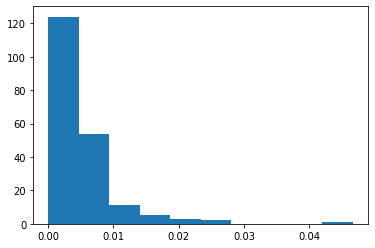

openbookqa


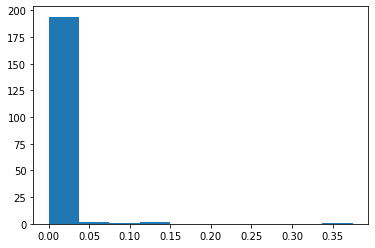

commonsense_qa


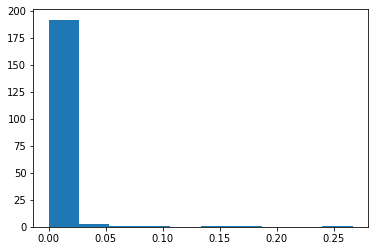

codah


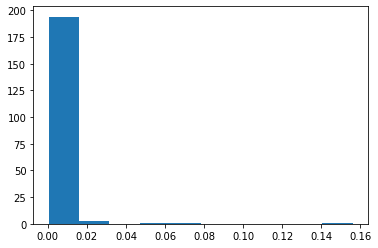

ai2_arc


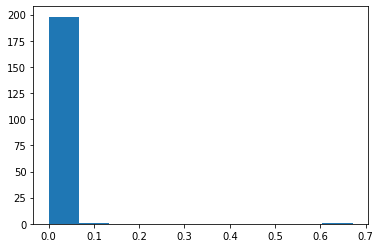

superglue-copa


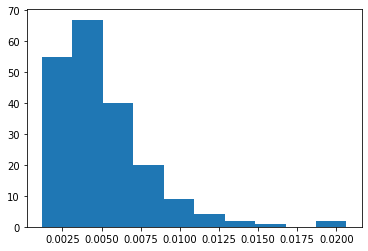

ethos-race


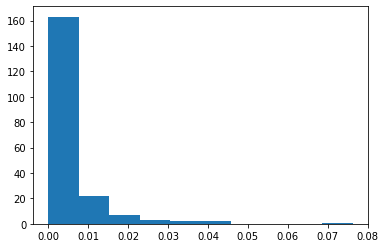

quartz-with_knowledge


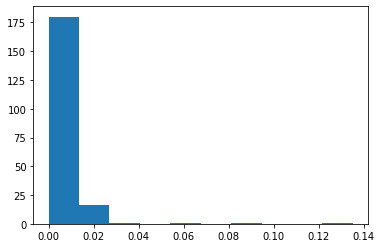

sick


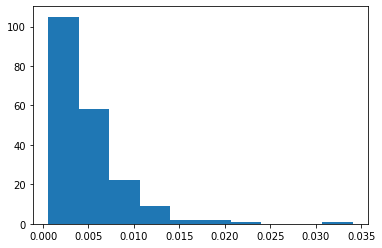

tweet_eval-stance_feminist


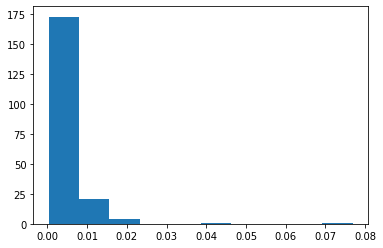

quarel


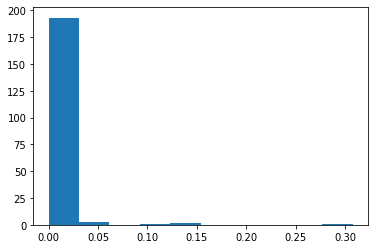

medical_questions_pairs


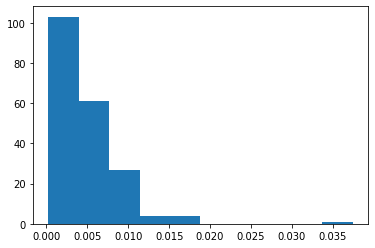

qasc


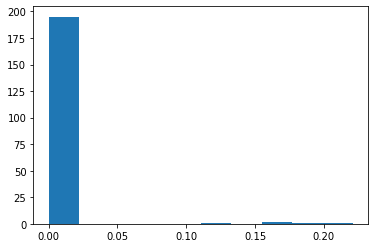

ethos-national_origin


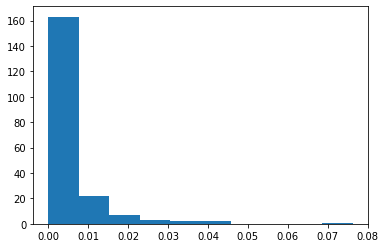

ethos-religion


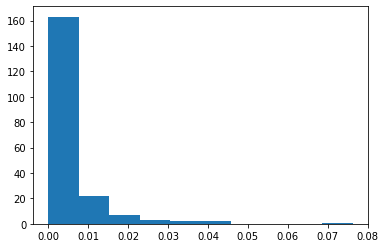

hate_speech18


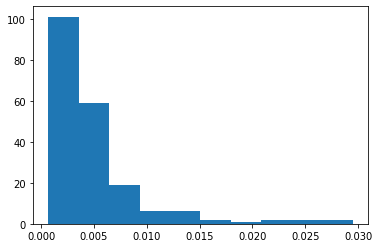

superglue-cb


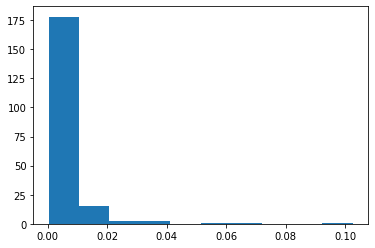

dream


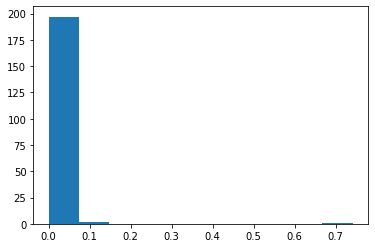

glue-wnli


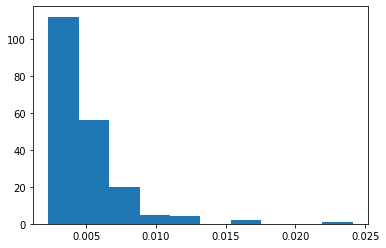

glue-mrpc


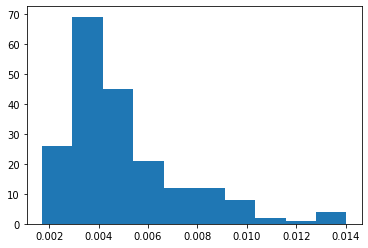

tweet_eval-hate


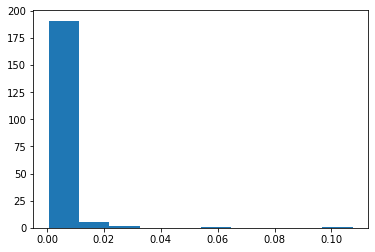

quartz-no_knowledge


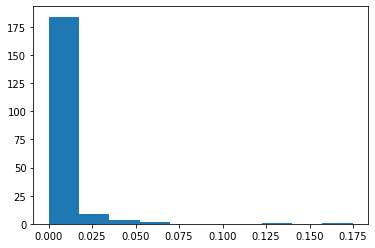

poem_sentiment


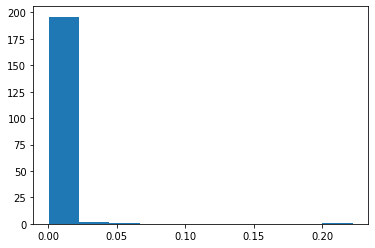

climate_fever


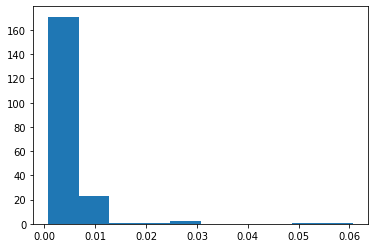

glue-rte


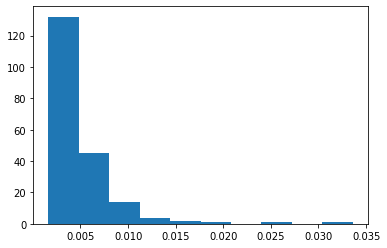

In [16]:
import numpy as np
uncertainty_path = 'results/gpt2_uncertainty_sampling'
for file in os.listdir(uncertainty_path):
    task = file[:-4]
    weights = np.load(os.path.join(uncertainty_path, file))
    print(task)
    plt.hist(weights / weights.sum(keepdims=True))
    plt.show()